In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
# loading the sklearn dataset that is a regression problem
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# Converting the dictionary into understandable dataframe
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['target'] = boston['target']

In [4]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
np.random.seed(4)
X,y = boston_df.drop('target', axis = 1), boston_df['target']
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [6]:
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7228560765383043

In [7]:
# Can we estimate better? Trying with random forest regressor
np.random.seed(4)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8245470262711692

In [8]:
# Choosing a model for classification dataset
heart_disease = pd.read_csv("../../Datas/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
len(heart_disease)

303

In [10]:
# Using linear SVC
from sklearn.svm import LinearSVC
np.random.seed(4)
X, y = heart_disease.drop('target', axis = 1), heart_disease['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/home/visaal/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5573770491803278

In [11]:
# Using random forest classifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(4)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8688524590163934

In [12]:
y_preds = rf.predict(X_test)
y_preds

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [13]:
np.mean(y_test == y_preds)

0.8688524590163934

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

In [15]:
y_pre = rf.predict_proba(X_test)

In [16]:
y_pre

array([[0.57, 0.43],
       [0.67, 0.33],
       [0.15, 0.85],
       [0.02, 0.98],
       [0.62, 0.38],
       [0.62, 0.38],
       [0.61, 0.39],
       [0.05, 0.95],
       [0.31, 0.69],
       [0.4 , 0.6 ],
       [0.42, 0.58],
       [0.1 , 0.9 ],
       [0.12, 0.88],
       [0.74, 0.26],
       [0.29, 0.71],
       [0.95, 0.05],
       [0.12, 0.88],
       [0.07, 0.93],
       [0.6 , 0.4 ],
       [0.45, 0.55],
       [0.02, 0.98],
       [0.22, 0.78],
       [0.93, 0.07],
       [0.54, 0.46],
       [0.53, 0.47],
       [0.97, 0.03],
       [0.51, 0.49],
       [0.15, 0.85],
       [0.18, 0.82],
       [0.79, 0.21],
       [0.65, 0.35],
       [0.46, 0.54],
       [0.09, 0.91],
       [0.32, 0.68],
       [0.42, 0.58],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.22, 0.78],
       [0.22, 0.78],
       [0.93, 0.07],
       [0.87, 0.13],
       [0.81, 0.19],
       [0.82, 0.18],
       [0.22, 0.78],
       [0.  , 1.  ],
       [0.33, 0.67],
       [0.92, 0.08],
       [0.63,

In [17]:
# Using Cross validation score to check the accuracy of the model
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X, y, cv = 5)

array([0.81967213, 0.8852459 , 0.78688525, 0.81666667, 0.78333333])

 **Area under the receiver operating characteristic curve(AUC/ROC)
 * Area under the curve(AUC)
 * ROC curve
 
 ROC curves are a comparision of model's true positive rate (tpr) versus a false positive rate (fpr)
 
 * True Positive = model predicts 1 when the true value is 1
 * False Positive = model predicts 1 when the true value is 0
 * True Negative = modle predicts 0 when the true value is 0
 * False Negative = model predicts 0 when the true values is 1

In [18]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
np.random.seed(4)
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [19]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)

In [20]:
y_prob

array([[0.54, 0.46],
       [0.6 , 0.4 ],
       [0.15, 0.85],
       [0.01, 0.99],
       [0.66, 0.34],
       [0.74, 0.26],
       [0.67, 0.33],
       [0.07, 0.93],
       [0.32, 0.68],
       [0.25, 0.75],
       [0.35, 0.65],
       [0.12, 0.88],
       [0.18, 0.82],
       [0.66, 0.34],
       [0.28, 0.72],
       [0.96, 0.04],
       [0.17, 0.83],
       [0.07, 0.93],
       [0.64, 0.36],
       [0.37, 0.63],
       [0.01, 0.99],
       [0.18, 0.82],
       [0.92, 0.08],
       [0.57, 0.43],
       [0.49, 0.51],
       [0.95, 0.05],
       [0.7 , 0.3 ],
       [0.21, 0.79],
       [0.06, 0.94],
       [0.71, 0.29],
       [0.56, 0.44],
       [0.35, 0.65],
       [0.08, 0.92],
       [0.32, 0.68],
       [0.46, 0.54],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.22, 0.78],
       [0.34, 0.66],
       [0.92, 0.08],
       [0.9 , 0.1 ],
       [0.86, 0.14],
       [0.86, 0.14],
       [0.26, 0.74],
       [0.02, 0.98],
       [0.4 , 0.6 ],
       [0.89, 0.11],
       [0.63,

In [21]:
y_positive = y_prob[:,1]

In [22]:
y_positive

array([0.46, 0.4 , 0.85, 0.99, 0.34, 0.26, 0.33, 0.93, 0.68, 0.75, 0.65,
       0.88, 0.82, 0.34, 0.72, 0.04, 0.83, 0.93, 0.36, 0.63, 0.99, 0.82,
       0.08, 0.43, 0.51, 0.05, 0.3 , 0.79, 0.94, 0.29, 0.44, 0.65, 0.92,
       0.68, 0.54, 0.95, 1.  , 0.78, 0.66, 0.08, 0.1 , 0.14, 0.14, 0.74,
       0.98, 0.6 , 0.11, 0.37, 0.2 , 0.58, 0.05, 0.55, 0.23, 0.5 , 0.95,
       0.95, 0.87, 0.76, 0.08, 0.07, 0.85])

In [23]:
fpr, tpr, threshold = roc_curve(y_test, y_positive)

In [24]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.04, 0.04, 0.08, 0.08, 0.12, 0.12, 0.16, 0.16, 0.28,
       0.36, 0.52, 0.52, 0.56, 0.64, 0.72, 0.84, 0.88, 0.96, 1.  ])

In [25]:
tpr

array([0.        , 0.02777778, 0.08333333, 0.11111111, 0.19444444,
       0.22222222, 0.27777778, 0.36111111, 0.41666667, 0.44444444,
       0.5       , 0.66666667, 0.72222222, 0.72222222, 0.77777778,
       0.77777778, 0.86111111, 0.86111111, 0.94444444, 0.94444444,
       0.97222222, 0.97222222, 0.97222222, 0.97222222, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [26]:
threshold

array([2.  , 1.  , 0.99, 0.98, 0.95, 0.94, 0.93, 0.87, 0.85, 0.83, 0.82,
       0.72, 0.68, 0.66, 0.65, 0.63, 0.55, 0.54, 0.46, 0.44, 0.43, 0.36,
       0.34, 0.26, 0.23, 0.2 , 0.14, 0.1 , 0.08, 0.07, 0.05, 0.04])

In [27]:
def plot_roc_curve(fpr, tpr):
    '''
    A function to plot the roc curve when we pass the false positive rate(fpr) and true positive rate(tpr)
    '''
    plt.plot(fpr, tpr,color = 'orange', label = 'ROC curve')
    plt.plot([0,1],[0,1], linestyle = '--',color = 'darkblue', label = 'Guess line')
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Receiver Operating Characteristic Curve (ROC)')
    plt.legend()
    plt.show()

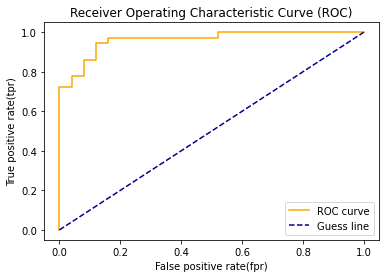

In [28]:
plot_roc_curve(fpr,tpr)

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_positive)

0.9622222222222223

In [30]:
fpr, tpr, threshold = roc_curve(y_test, y_test)

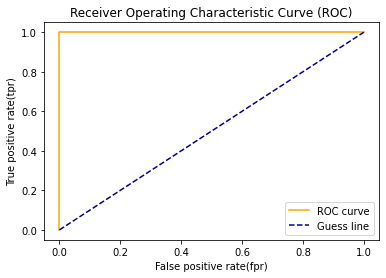

In [31]:
plot_roc_curve(fpr, tpr)

In [32]:
roc_auc_score(y_test, y_test)

1.0

** Confusion Matrix
* A quick way to compare the labels a model predicts and actual labels it was supposed to predict
* Gives us the idea about where our model is getting confused


In [33]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[22,  3],
       [ 4, 32]])

In [34]:
# Visualixing using pandas crosstab
pd.crosstab(y_test, y_preds, rownames = ['Actual label'], colnames = ['Predicted labels'])

Predicted labels,0,1
Actual label,,
0,22,3
1,4,32


<AxesSubplot:>

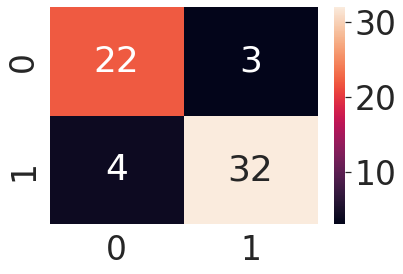

In [35]:
# using seaborn
import seaborn as sns
confusion = confusion_matrix(y_test, y_preds)
sns.set(font_scale = 3 )
sns.heatmap(confusion, annot = True)

**Classification report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.91      0.89      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [37]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


R-squared

In [38]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(4)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8130380078489517

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

0.8130380078489517

In [40]:
y_test_mean_array = np.full(len(y_test), np.mean(y_test))
r2_score(y_test, y_test_mean_array)

0.0

In [41]:
r2_score(y_test, y_test)

1.0

In [42]:
from sklearn.metrics import mean_absolute_error
np.random.seed(4)
y_preds = model.predict(X_test)
mean_absolute_error(y_test, y_preds)

2.3808823529411773

In [43]:
df = pd.DataFrame({'Actual value': y_test, 'Predicted Value': y_preds})
df

,Actual value,Predicted Value
8,16.5,18.410
289,24.8,24.819
68,17.4,19.104
211,19.3,19.694
226,37.6,47.576
...,...,...
368,50.0,29.411
144,11.8,14.653
336,19.5,19.397
437,8.7,9.416


In [44]:
df['Errors'] = df['Predicted Value'] - df['Actual value']

In [45]:
df

,Actual value,Predicted Value,Errors
8,16.5,18.410,1.910
289,24.8,24.819,0.019
68,17.4,19.104,1.704
211,19.3,19.694,0.394
226,37.6,47.576,9.976
...,...,...,...
368,50.0,29.411,-20.589
144,11.8,14.653,2.853
336,19.5,19.397,-0.103
437,8.7,9.416,0.716


In [46]:
abs_error = np.absolute(df['Errors'])
abs_error.mean()

2.3808823529411773

In [47]:
y_test

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
       ... 
368    50.0
144    11.8
336    19.5
437     8.7
216    23.3
Name: target, Length: 102, dtype: float64

In [48]:
y_preds

array([18.41 , 24.819, 19.104, 19.694, 47.576, 23.849, 34.355, 18.318,
       15.931, 15.356, 29.492, 25.266, 21.026, 24.335, 21.81 , 13.735,
       19.651, 11.425, 13.118, 15.805,  7.517, 15.307, 19.12 , 20.04 ,
       20.492, 20.428, 18.4  , 15.412, 22.408, 18.343, 12.368, 22.976,
       32.757, 22.693, 14.116, 12.839, 31.406, 45.929, 23.898, 23.237,
       45.176, 30.542, 13.134, 30.049, 28.513, 20.313, 47.803, 19.708,
       21.282, 23.115, 30.533, 22.617, 10.717, 27.441, 14.8  , 20.701,
       25.468, 31.562, 20.232, 29.825, 17.28 , 20.867, 28.673, 20.473,
       45.586, 27.633, 28.112,  8.56 , 19.283, 22.179, 21.769, 20.605,
       25.207, 26.611, 16.73 , 33.523, 15.176, 23.701, 15.88 , 21.84 ,
       20.058, 16.207, 26.401, 20.302, 24.577, 21.192, 33.55 , 20.641,
       21.293, 47.325, 28.233, 48.589, 19.522, 47.678, 20.996, 21.266,
       21.212, 29.411, 14.653, 19.397,  9.416, 20.991])

In [49]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mean_squared_error(y_test, y_preds)

17.36675443137256

In [50]:
(df['Errors']**2).mean()

17.366754431372556

In [51]:
# Diving into scoring parameter of cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()


In [52]:
np.random.seed(42)
cvs = cross_val_score(clf, X, y, cv = 5)

In [53]:
print(f"The model accuracy is {np.mean(cvs)*100:.2f}%")

The model accuracy is 82.48%


In [54]:
np.random.seed(42)
cvs = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')
print(f"The model accuracy is {((cvs.mean())*100):.2f}%")

The model accuracy is 82.48%


In [55]:
np.random.seed(42)
cvs = cross_val_score(clf, X, y, cv = 5, scoring = 'precision')
print(f"The model accuracy is {((cvs.mean())*100):.2f}%")

The model accuracy is 83.30%


In [56]:
np.random.seed(42)
cvs = cross_val_score(clf, X, y, cv = 5, scoring = 'recall')
print(f"The model accuracy is {((cvs.mean())*100):.2f}%")

The model accuracy is 85.45%


In [57]:
np.random.seed(42)
cvs = cross_val_score(clf, X, y, cv = 5, scoring = 'f1')
print(f"The model accuracy is {((cvs.mean())*100):.2f}%")

The model accuracy is 84.27%


In [58]:
# For regression problems
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']
model = RandomForestRegressor()
cross_val_score(model, X, y, cv = 5, scoring = None).mean()

0.6243870737930857

In [59]:
np.random.seed(42)
cross_val_score(model, X, y, cv = 5, scoring = 'r2').mean()

0.6243870737930857

In [60]:
np.random.seed(42)
cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_absolute_error').mean()

-3.0312352552902335

In [61]:
np.random.seed(42)
cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_squared_error').mean()

-21.261442856882137

In [62]:
# Wrapping it all up
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_preds)}")
print(f"Precision Score: {precision_score(y_test, y_preds)}")
print(f"Recall Score: {recall_score(y_test, y_preds)}")
print(f"f1 score: {f1_score(y_test, y_preds)}")


Accuracy Score: 0.8524590163934426
Precision Score: 0.8484848484848485
Recall Score: 0.875
f1 score: 0.8615384615384615


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
ypreds = model.predict(X_test)
print(f"R squared: {r2_score(y_test, ypreds)}")
print(f"mean absolute error: {mean_absolute_error(y_test, ypreds)}")
print(f"mean squared error: {mean_squared_error(y_test, ypreds)}")

R squared: 0.8654448653350507
mean absolute error: 2.136382352941176
mean squared error: 9.867437068627442


# Improving our model


## Tuning hyperparameters by hand

In [64]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:

def evaluate_model(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1_scoe = f1_score(y_true, y_preds)
    metrics = {'Accuracy': accuracy, "Precision": precision, "Recall": recall, "F1 score": f1_scoe}
    return metrics

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac = 1)

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_preds = clf.predict(X_valid)
base_line_metrics = evaluate_model(y_valid, y_preds)


In [67]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [76]:
np.random.seed(42)
clf2 = RandomForestClassifier(n_estimators = 200, max_depth = 100)
clf2.fit(X_train, y_train)
y_preds = clf2.predict(X_valid)
by_hand_metrics = evaluate_model(y_valid, y_preds)

## Hyperparameter tuning using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

grid = {'n_estimators':[10,100,200,400,800,1000,1200],
        'max_depth':[None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2,4,6],
        'min_samples_leaf': [1,2,4]}

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions = grid,
                            n_iter = 10,
                            cv = 5,
                            verbose = 2
                           )
rs_clf.fit(X_train, y_train)

In [70]:
rs_clf.best_params_

{'n_estimators': 800,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

In [73]:
rs_metrics = evaluate_model(y_test, rs_clf.predict(X_test))

In [74]:
rs_metrics

{'Accuracy': 0.8360655737704918,
 'Precision': 0.78125,
 'Recall': 0.8928571428571429,
 'F1 score': 0.8333333333333334}

## Tuning using GridSearchCV

In [79]:
grid

{'n_estimators': [10, 100, 200, 400, 800, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
grid_2 = {'n_estimators': [10, 200, 800, 1000],
           'max_depth': [None, 20],
           'max_features': ['auto', 'sqrt'],
           'min_samples_split': [2, 4],
           'min_samples_leaf': [2, 4]}

X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

clf = RandomForestClassifier(n_jobs=1) 
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv = 5,
                      verbose = 2)
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_es

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   1.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   2.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=800; total time=   1.9s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=Non

[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=800; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=s

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 200, 800, 1000]},
             verbose=2)

In [83]:
gs_clf.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [84]:
gs_y_preds = gs_clf.predict(X_test)

In [85]:
gs_metrics = evaluate_model(y_test, gs_y_preds)

In [86]:
gs_metrics

{'Accuracy': 0.8360655737704918,
 'Precision': 0.78125,
 'Recall': 0.8928571428571429,
 'F1 score': 0.8333333333333334}

<AxesSubplot:>

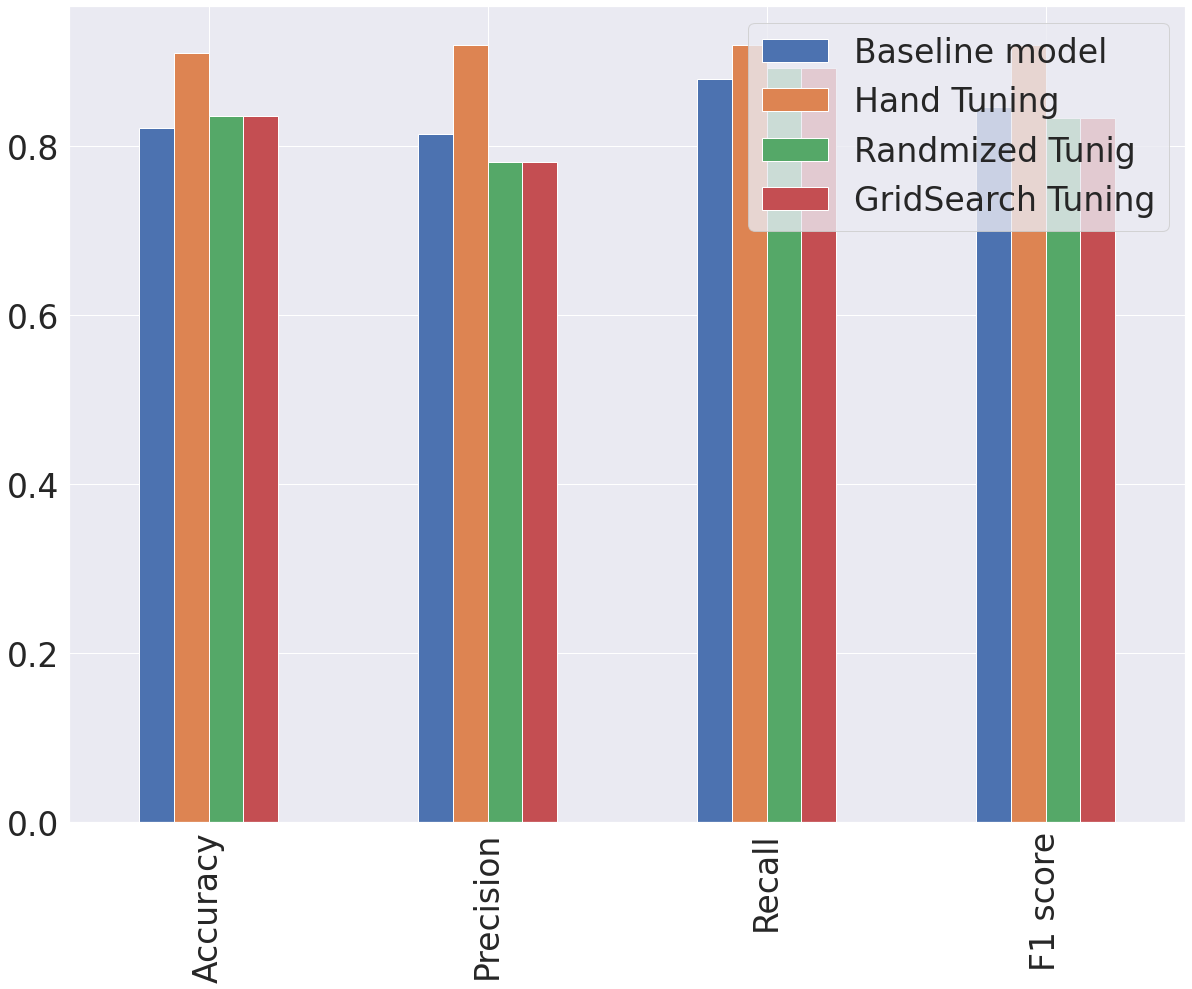

In [91]:
# comparing all the model metrices
metrics_df = pd.DataFrame({'Baseline model': base_line_metrics, 
                           'Hand Tuning': by_hand_metrics,
                           'Randmized Tunig': rs_metrics,
                           'GridSearch Tuning':gs_metrics})
metrics_df.plot.bar(figsize = (20,15))